In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

lets import the necessary libraries for this analysis

In [2]:
df=pd.read_csv("/content/sample_data/data_orders.csv")
df

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3.000583e+12,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3.000583e+12,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3.000583e+12,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3.000583e+12,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3.000583e+12,9,0,NaN
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3.000599e+12,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3.000599e+12,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3.000599e+12,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3.000599e+12,4,0,6.0


we have successfully imported the dataset from the directory now it's time to start the data cleaning process

* checking null values
* checking duplicate values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  float64
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 669.9+ KB


In [4]:
df.isnull().sum()

,0
order_datetime,0
origin_longitude,0
origin_latitude,0
m_order_eta,7902
order_gk,0
order_status_key,0
is_driver_assigned_key,0
cancellations_time_in_seconds,3409


In [5]:
df.duplicated().sum()

0

there is no duplicate values

even though we have null values we cannot remove the null values as because the null values are associated with the data set let me explain as you can see m_order_eta is the time taken after the driver is assigned if the driver is not assigned you wont have the m order eta which makes sense

In [ ]:
df.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
count,10716.000000,10716.000000,2814.000000,1.071600e+04,10716.000000,10716.000000,7307.000000
mean,-0.964323,51.450541,441.415423,3.000598e+12,5.590612,0.262598,157.892021
std,0.022818,0.011984,288.006379,2.396261e+07,2.328845,0.440066,213.366963
min,-1.066957,51.399323,60.000000,3.000550e+12,4.000000,0.000000,3.000000
25%,-0.974363,51.444643,233.000000,3.000583e+12,4.000000,0.000000,45.000000
50%,-0.966386,51.451972,368.500000,3.000595e+12,4.000000,0.000000,98.000000
75%,-0.949605,51.456725,653.000000,3.000623e+12,9.000000,1.000000,187.500000
max,-0.867088,51.496169,1559.000000,3.000633e+12,9.000000,1.000000,4303.000000


Lets start the eda process

In [ ]:
df1=df[df['order_status_key']==4]
df1

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3.000583e+12,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3.000583e+12,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3.000583e+12,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3.000583e+12,4,1,62.0
9,06:33:52,-0.976216,51.433202,NaN,3.000583e+12,4,0,78.0
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3.000599e+12,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3.000599e+12,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3.000599e+12,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3.000599e+12,4,0,6.0


In [ ]:
df2=df1.groupby(['order_status_key','is_driver_assigned_key'],as_index=False)['cancellations_time_in_seconds'].count()
df2


,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,4,0,4496
1,4,1,2811


In [ ]:
def change(x):
  if x['order_status_key']==4 and x['is_driver_assigned_key']==0:
    return 'cancelled before driver assinged'
  else:
    return 'cancelled after driver assinged'

df2['criteria']=df2.apply(change,axis=1)
df2

,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,criteria
0,4,0,4496,cancelled before driver assinged
1,4,1,2811,cancelled after driver assinged


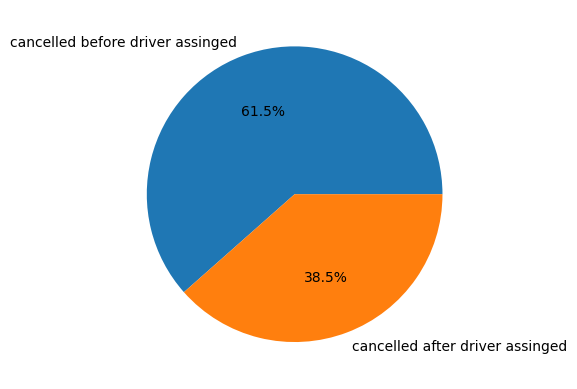

In [ ]:

plt.pie(df2['cancellations_time_in_seconds'],labels=df2['criteria'],autopct='%1.1f%%')
plt.show()

from the above distribution we can analyze that 60% of the people cancelled the cab before the driver got assinged and 40% of the people cancelled the cab after the driver got assinged


so we gonna import the datetime libraries to get some more insights

In [ ]:
import datetime as dt

In [ ]:
df['order_datetime']=pd.to_datetime(df['order_datetime'])
df

<ipython-input-35-831190d188a8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_datetime']=pd.to_datetime(df['order_datetime'])


,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,2024-07-12 18:08:07,-0.978916,51.456173,60.0,3.000583e+12,4,1,198.0
1,2024-07-12 20:57:32,-0.950385,51.456843,NaN,3.000583e+12,4,0,128.0
2,2024-07-12 12:07:50,-0.969520,51.455544,477.0,3.000583e+12,4,1,46.0
3,2024-07-12 13:50:20,-1.054671,51.460544,658.0,3.000583e+12,4,1,62.0
4,2024-07-12 21:24:45,-0.967605,51.458236,NaN,3.000583e+12,9,0,NaN
...,...,...,...,...,...,...,...,...
10711,2024-07-12 13:11:35,-0.975372,51.457846,NaN,3.000599e+12,4,0,36.0
10712,2024-07-12 13:13:55,-0.975372,51.457846,NaN,3.000599e+12,4,0,4.0
10713,2024-07-12 13:17:21,-0.972926,51.457693,60.0,3.000599e+12,4,1,34.0
10714,2024-07-12 13:16:28,-0.975372,51.457846,NaN,3.000599e+12,4,0,6.0


In [ ]:
df['time_only']=df['order_datetime'].dt.time
df

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,time_only
0,2024-07-12 18:08:07,-0.978916,51.456173,60.0,3.000583e+12,4,1,198.0,18:08:07
1,2024-07-12 20:57:32,-0.950385,51.456843,NaN,3.000583e+12,4,0,128.0,20:57:32
2,2024-07-12 12:07:50,-0.969520,51.455544,477.0,3.000583e+12,4,1,46.0,12:07:50
3,2024-07-12 13:50:20,-1.054671,51.460544,658.0,3.000583e+12,4,1,62.0,13:50:20
4,2024-07-12 21:24:45,-0.967605,51.458236,NaN,3.000583e+12,9,0,NaN,21:24:45
...,...,...,...,...,...,...,...,...,...
10711,2024-07-12 13:11:35,-0.975372,51.457846,NaN,3.000599e+12,4,0,36.0,13:11:35
10712,2024-07-12 13:13:55,-0.975372,51.457846,NaN,3.000599e+12,4,0,4.0,13:13:55
10713,2024-07-12 13:17:21,-0.972926,51.457693,60.0,3.000599e+12,4,1,34.0,13:17:21
10714,2024-07-12 13:16:28,-0.975372,51.457846,NaN,3.000599e+12,4,0,6.0,13:16:28


In [ ]:
import time as ti

In [ ]:
dff=df['order_gk'].value_counts()
dff

order_gk
3.000583e+12    1
3.000591e+12    1
3.000591e+12    1
3.000591e+12    1
3.000591e+12    1
               ..
3.000588e+12    1
3.000588e+12    1
3.000588e+12    1
3.000588e+12    1
3.000593e+12    1
Name: count, Length: 10716, dtype: int64

In [ ]:
df['hour']=df['order_datetime'].dt.hour
df

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,time_only,hour
0,2024-07-12 18:08:07,-0.978916,51.456173,60.0,3.000583e+12,4,1,198.0,18:08:07,18
1,2024-07-12 20:57:32,-0.950385,51.456843,NaN,3.000583e+12,4,0,128.0,20:57:32,20
2,2024-07-12 12:07:50,-0.969520,51.455544,477.0,3.000583e+12,4,1,46.0,12:07:50,12
3,2024-07-12 13:50:20,-1.054671,51.460544,658.0,3.000583e+12,4,1,62.0,13:50:20,13
4,2024-07-12 21:24:45,-0.967605,51.458236,NaN,3.000583e+12,9,0,NaN,21:24:45,21
...,...,...,...,...,...,...,...,...,...,...
10711,2024-07-12 13:11:35,-0.975372,51.457846,NaN,3.000599e+12,4,0,36.0,13:11:35,13
10712,2024-07-12 13:13:55,-0.975372,51.457846,NaN,3.000599e+12,4,0,4.0,13:13:55,13
10713,2024-07-12 13:17:21,-0.972926,51.457693,60.0,3.000599e+12,4,1,34.0,13:17:21,13
10714,2024-07-12 13:16:28,-0.975372,51.457846,NaN,3.000599e+12,4,0,6.0,13:16:28,13


In [ ]:
d_by_hour=df['hour'].value_counts()
d_by_hour

hour
8     1082
21     846
23     836
22     716
0      683
2      555
17     541
3      513
1      471
20     469
7      447
15     439
18     414
9      412
13     366
16     356
19     317
14     256
12     256
11     193
10     170
6      159
4      152
5       67
Name: count, dtype: int64

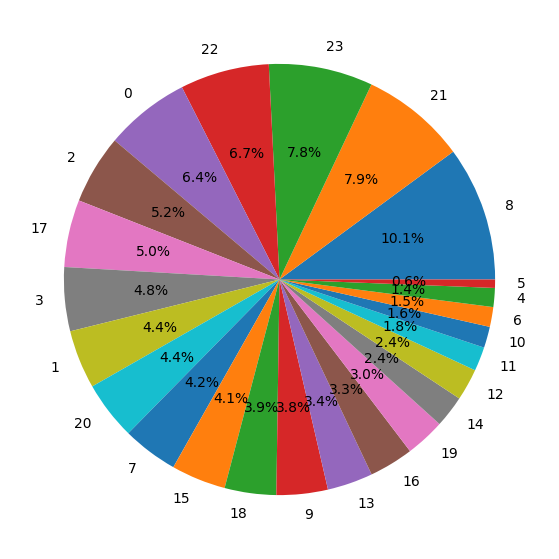

In [ ]:
plt.figure(figsize=(30,7))
plt.pie(d_by_hour,labels=d_by_hour.index,autopct="%1.1f%%")
plt.show()

8th hour was the time where most of the people failed to book a cab i mean the failed orders are at the highest in the 8th hour

In [ ]:
average_eta=df.groupby('hour',as_index=False)['m_order_eta'].mean()
average_etar=average_eta.sort_values(by='m_order_eta',ascending=False)
average_etar

,hour,m_order_eta
8,8,636.910828
7,7,583.358974
17,17,519.742515
9,9,504.891026
15,15,454.790210
12,12,440.787879
16,16,440.568182
13,13,428.025000
6,6,427.148936
18,18,419.186567


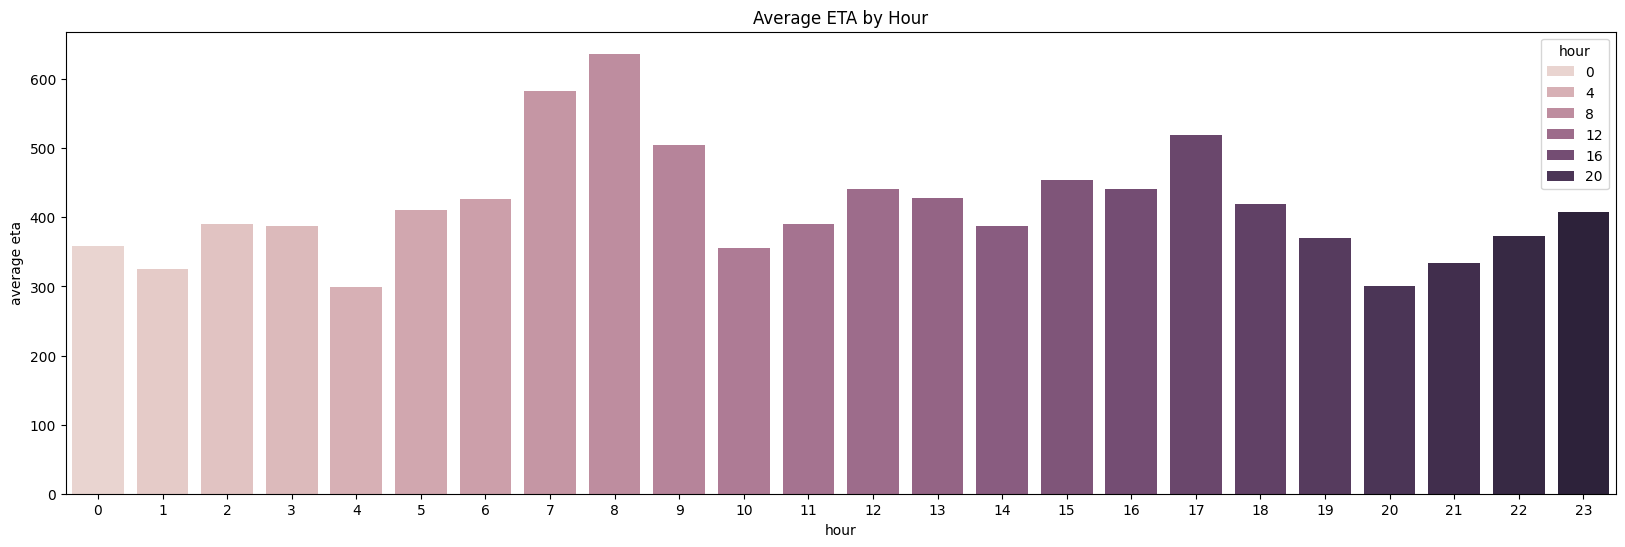

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x='hour',y='m_order_eta',data=average_etar,hue='hour')
plt.title('Average ETA by Hour')
plt.xlabel('hour')
plt.ylabel('average eta')
plt.show()


the average estimate time arrival is maximum in the 8th hour it means people waited for so long at this time for the driver to arrive from the pickup point

In [ ]:
df_dat=df[df['order_status_key']==4]
df_dat

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,time_only,hour
0,2024-07-12 18:08:07,-0.978916,51.456173,60.0,3.000583e+12,4,1,198.0,18:08:07,18
1,2024-07-12 20:57:32,-0.950385,51.456843,NaN,3.000583e+12,4,0,128.0,20:57:32,20
2,2024-07-12 12:07:50,-0.969520,51.455544,477.0,3.000583e+12,4,1,46.0,12:07:50,12
3,2024-07-12 13:50:20,-1.054671,51.460544,658.0,3.000583e+12,4,1,62.0,13:50:20,13
9,2024-07-12 06:33:52,-0.976216,51.433202,NaN,3.000583e+12,4,0,78.0,06:33:52,6
...,...,...,...,...,...,...,...,...,...,...
10711,2024-07-12 13:11:35,-0.975372,51.457846,NaN,3.000599e+12,4,0,36.0,13:11:35,13
10712,2024-07-12 13:13:55,-0.975372,51.457846,NaN,3.000599e+12,4,0,4.0,13:13:55,13
10713,2024-07-12 13:17:21,-0.972926,51.457693,60.0,3.000599e+12,4,1,34.0,13:17:21,13
10714,2024-07-12 13:16:28,-0.975372,51.457846,NaN,3.000599e+12,4,0,6.0,13:16:28,13


In [ ]:
avg_tim_can=df_dat.groupby(['hour','is_driver_assigned_key'],as_index=False)['cancellations_time_in_seconds'].mean()
avg_tim_can

,hour,is_driver_assigned_key,cancellations_time_in_seconds
0,0,0,111.557047
1,0,1,293.616667
2,1,0,98.132420
3,1,1,247.715909
4,2,0,106.438819
5,2,1,303.307692
6,3,0,104.361607
7,3,1,292.640625
8,4,0,90.000000
9,4,1,243.219512


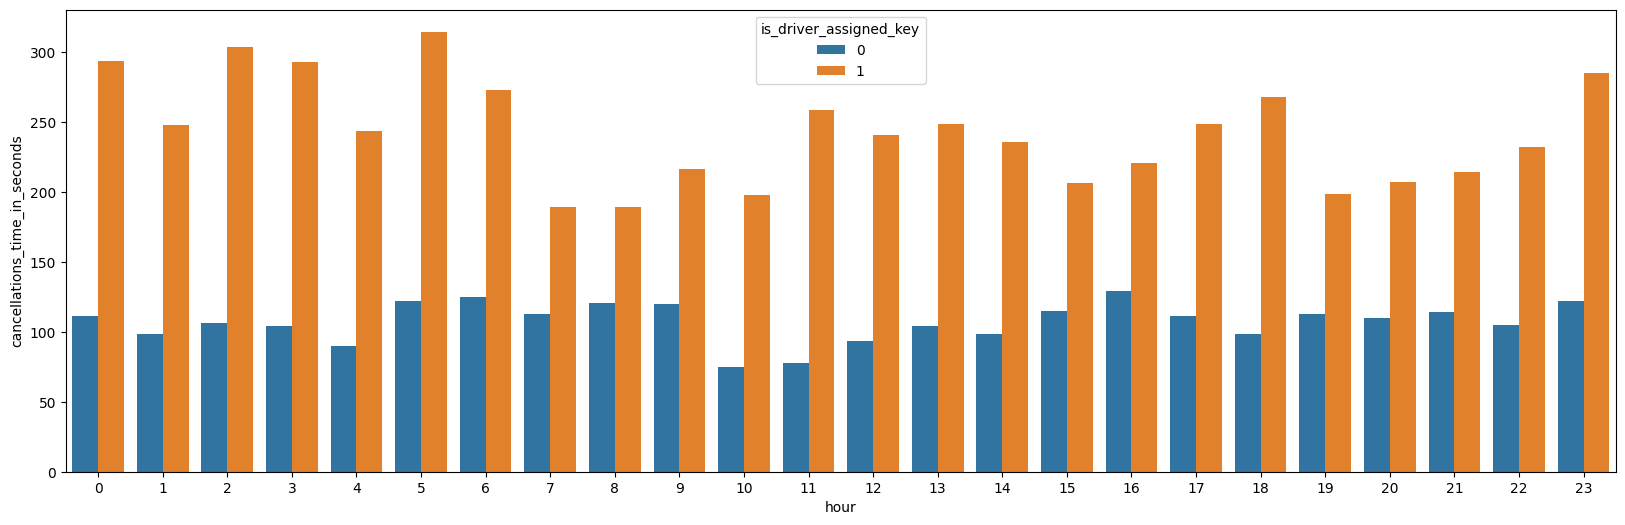

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x='hour',y='cancellations_time_in_seconds',data=avg_tim_can,hue='is_driver_assigned_key')
plt.show()

As you can see from the above graph the average cancellation time after the driver got assigned is huge in all the hours compared to before the driver got assigned